In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 
import plotly.figure_factory as ff

In [2]:
income_data = pd.read_csv('income_clean.csv')
income_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
income_data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
30161,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [4]:
income_data.shape

(30162, 14)

In [5]:
income_data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K'],
      dtype='object')

In [7]:
income_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### finding for missing values

In [8]:
income_data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64

#### Category frequency distribution

In [10]:
cat_df = income_data.select_dtypes(include=['object'])

for col in cat_df.columns:
    freq = income_data[col].value_counts()
    freq = pd.DataFrame(freq)
    print(freq)

                  workclass
Private               22286
Self-emp-not-inc       2499
Local-gov              2067
State-gov              1279
Self-emp-inc           1074
Federal-gov             943
Without-pay              14
              education
HS-grad            9840
Some-college       6678
Bachelors          5044
Masters            1627
Assoc-voc          1307
11th               1048
Assoc-acdm         1008
10th                820
7th-8th             557
Prof-school         542
9th                 455
12th                377
Doctorate           375
5th-6th             288
1st-4th             151
Preschool            45
                       marital-status
Married-civ-spouse              14065
Never-married                    9726
Divorced                         4214
Separated                         939
Widowed                           827
Married-spouse-absent             370
Married-AF-spouse                  21
                   occupation
Prof-specialty           4038
Craf

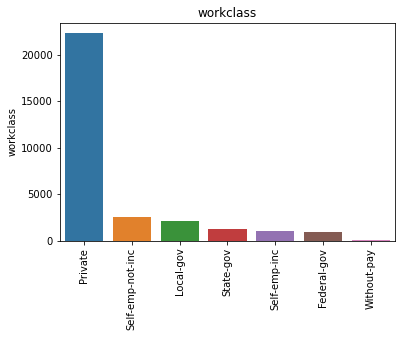

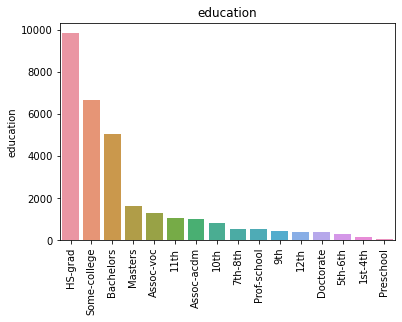

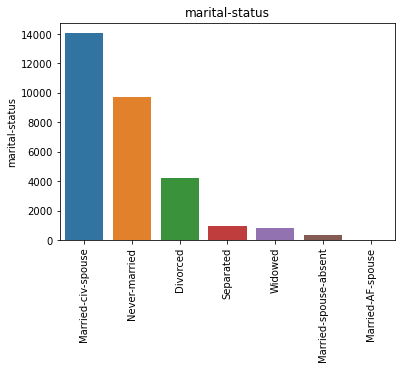

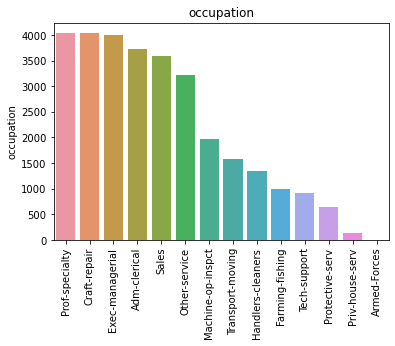

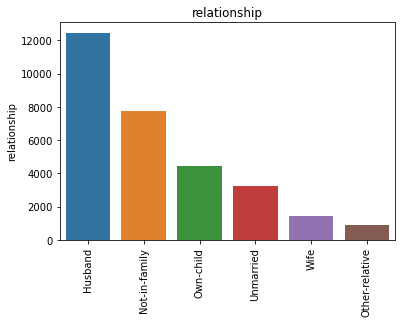

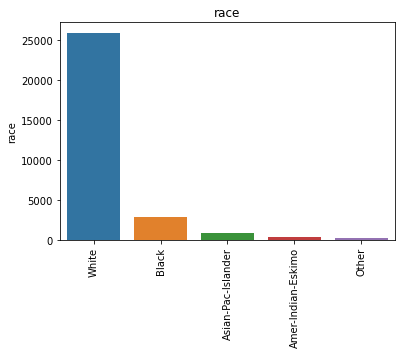

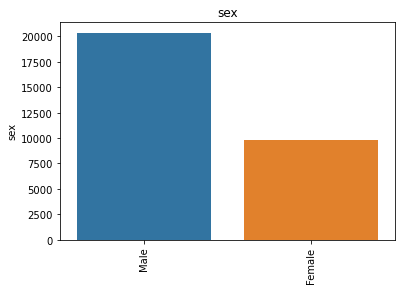

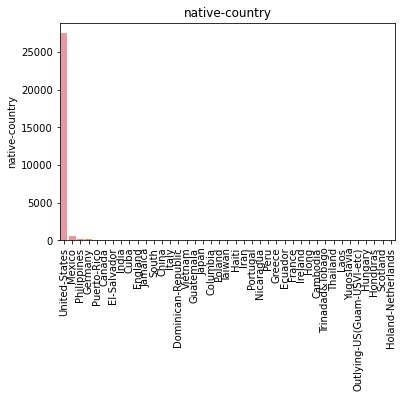

In [33]:
def countplots():
    for col in cat_df:
        cat = income_data[col].value_counts() # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)

        plt.title(col)
        plt.show()
countplots()

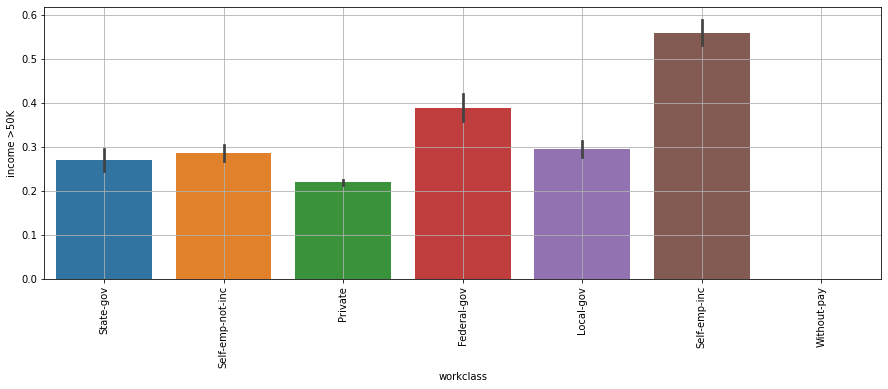

In [47]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=income_data.workclass ,y=income_data['income >50K'], data=income_data)
plt.xticks(rotation=90)
plt.grid()

In [73]:
income_data.groupby(['native-country'])['income >50K'].mean()

native-country
Cambodia                      0.388889
Canada                        0.336449
China                         0.294118
Columbia                      0.035714
Cuba                          0.271739
Dominican-Republic            0.029851
Ecuador                       0.148148
El-Salvador                   0.090000
England                       0.348837
France                        0.444444
Germany                       0.343750
Greece                        0.275862
Guatemala                     0.047619
Haiti                         0.095238
Holand-Netherlands            0.000000
Honduras                      0.083333
Hong                          0.315789
Hungary                       0.230769
India                         0.400000
Iran                          0.428571
Ireland                       0.208333
Italy                         0.352941
Jamaica                       0.125000
Japan                         0.389831
Laos                          0.117647
Mexico    

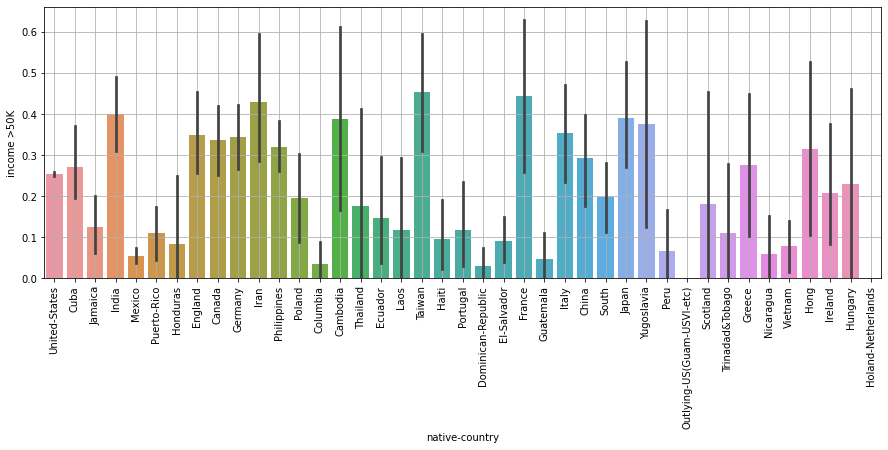

In [49]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=income_data['native-country'] ,y=income_data['income >50K'], data=income_data)
plt.xticks(rotation=90)
plt.grid()

In [72]:
income_data.groupby('occupation')['income >50K'].mean()

occupation
Adm-clerical         0.133835
Armed-Forces         0.111111
Craft-repair         0.225310
Exec-managerial      0.485220
Farming-fishing      0.116279
Handlers-cleaners    0.061481
Machine-op-inspct    0.124619
Other-service        0.041096
Priv-house-serv      0.006993
Prof-specialty       0.448489
Protective-serv      0.326087
Sales                0.270647
Tech-support         0.304825
Transport-moving     0.202926
Name: income >50K, dtype: float64

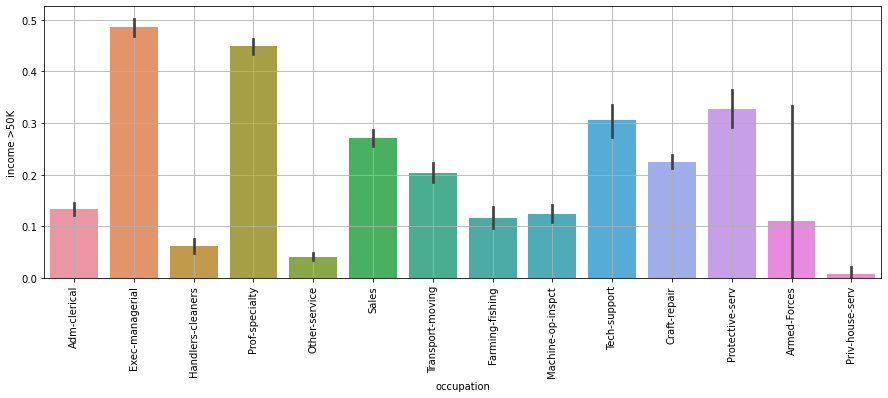

In [50]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=income_data.occupation ,y=income_data['income >50K'], data=income_data)
plt.xticks(rotation=90)
plt.grid()

In [71]:
income_data.groupby('race')['income >50K'].mean()

race
Amer-Indian-Eskimo    0.118881
Asian-Pac-Islander    0.277095
Black                 0.129925
Other                 0.090909
White                 0.263718
Name: income >50K, dtype: float64

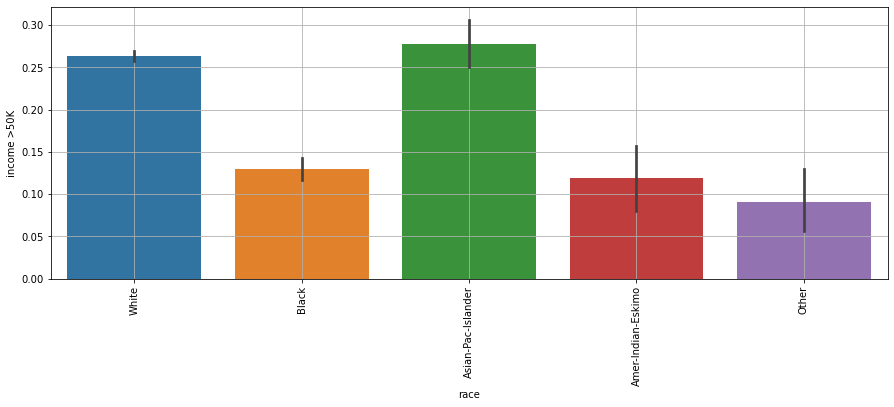

In [51]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=income_data.race ,y=income_data['income >50K'], data=income_data)
plt.xticks(rotation=90)
plt.grid()

In [70]:
income_data.groupby('sex')['income >50K'].mean()

sex
Female    0.113678
Male      0.313837
Name: income >50K, dtype: float64

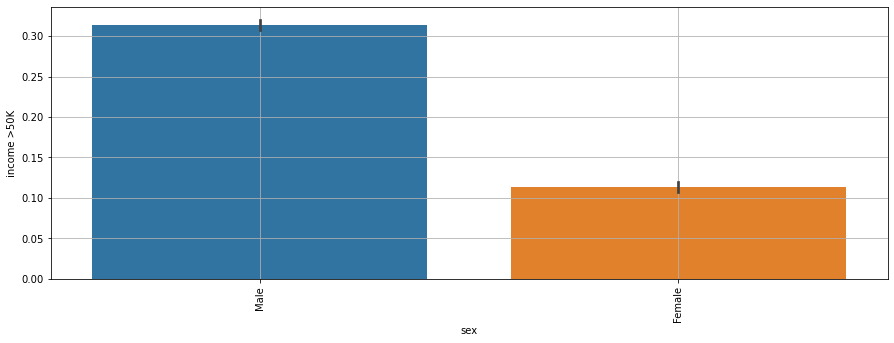

In [53]:
fig=plt.figure(figsize=(15,5))
sns.barplot(x=income_data.sex ,y=income_data['income >50K'], data=income_data)
plt.xticks(rotation=90)
plt.grid()